In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bequests_cleaned_df = pd.read_csv('bequests_cleaned.csv')

In [4]:
bequests_cleaned_df.columns

Index(['ROI_ID', 'ROI_FAMILY_ID', 'STATE', 'REGION_CODE', 'TOTAL_TRANSACTIONS',
       'TOTAL_AMOUNT', 'FIRST_GIFT_AMOUNT', 'MRC_AMOUNT', 'HPC_AMOUNT',
       'DEATH_FLAG', 'YEARS_SINCE_FIRST_GIFT', 'YEARS_SINCE_MRC_GIFT',
       'YEARS_SINCE_HPC_GIFT', 'BEQUEST_RECEIVED', 'BIRTH_YEAR', 'LE'],
      dtype='object')

In [5]:
bequests_cleaned_df.head()

,ROI_ID,ROI_FAMILY_ID,STATE,REGION_CODE,TOTAL_TRANSACTIONS,TOTAL_AMOUNT,FIRST_GIFT_AMOUNT,MRC_AMOUNT,HPC_AMOUNT,DEATH_FLAG,YEARS_SINCE_FIRST_GIFT,YEARS_SINCE_MRC_GIFT,YEARS_SINCE_HPC_GIFT,BEQUEST_RECEIVED,BIRTH_YEAR,LE
0,33930223,33930223,NY,NERO,3.0,55.0,25.0,15.0,25.0,0,22,22,22,0,1942.0,77.7
1,33930231,33930231,CT,NERO,29.0,950.0,15.0,50.0,55.0,0,22,1,1,0,1946.0,78.4
2,33930249,33930249,CT,NERO,14.0,415.0,15.0,25.0,60.0,0,22,1,10,0,1964.0,78.4
3,33930264,33930264,CA,PARO,1.0,15.0,15.0,15.0,15.0,0,22,22,22,0,NaN,79.0
4,33930272,33930272,NJ,NERO,23.0,1720.0,25.0,100.0,100.0,0,22,0,0,0,1964.0,77.5


In [6]:
bequests_cleaned_df.shape

(4520008, 16)

In [7]:
# Filter to only include rows where BIRTH_YEAR is not missing
bequests_cleaned_known_dob_df = bequests_cleaned_df[bequests_cleaned_df['BIRTH_YEAR'].notnull()]   

In [8]:
# Create AGE column by subtracting BIRTH_YEAR from 2024
bequests_cleaned_known_dob_df['AGE'] = 2024 - bequests_cleaned_known_dob_df['BIRTH_YEAR']

/var/folders/sz/t5qbt_3j01lc9b5ld0tfvkv80000gn/T/ipykernel_5780/178639372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bequests_cleaned_known_dob_df['AGE'] = 2024 - bequests_cleaned_known_dob_df['BIRTH_YEAR']


In [9]:
bequests_cleaned_known_dob_df.shape

(1989151, 17)

In [10]:
# Group by region
region_bequest_summary = bequests_cleaned_known_dob_df.groupby(['REGION_CODE']).agg(
    count=('ROI_FAMILY_ID', 'count'),
    avg_first_gift_amount=('FIRST_GIFT_AMOUNT', 'mean'),
    avg_most_recent_gift_amount=('MRC_AMOUNT', 'mean'),
    avg_highest_gift_amount=('HPC_AMOUNT', 'mean'),
    avg_total_gift_count=('TOTAL_TRANSACTIONS', 'mean'),
    avg_total_gift_amount=('TOTAL_AMOUNT', 'mean'),
    avg_years_giving=('YEARS_SINCE_FIRST_GIFT', 'mean'),
    avg_years_since_most_recent_gift=('YEARS_SINCE_MRC_GIFT', 'mean'),
    avg_years_since_highest_gift=('YEARS_SINCE_HPC_GIFT', 'mean'),
    avg_le = ('LE', 'mean'),
    avg_age = ('AGE', 'mean')
).reset_index()

In [11]:
region_bequest_summary

,REGION_CODE,count,avg_first_gift_amount,avg_most_recent_gift_amount,avg_highest_gift_amount,avg_total_gift_count,avg_total_gift_amount,avg_years_giving,avg_years_since_most_recent_gift,avg_years_since_highest_gift,avg_le,avg_age
0,AKRO,4164,27.956198,42.730744,61.842000,5.792507,305.160886,17.494476,12.354227,13.477185,76.600000,72.655139
1,MARO,214516,25.720387,68.914126,90.589462,5.794239,308.669492,18.196209,13.152091,14.308550,76.877659,76.218291
2,MWRO,477064,23.836513,44.342955,58.612378,5.322957,231.253433,18.105699,13.441394,14.513833,76.502483,76.202166
3,NERO,279992,29.937529,48.059317,83.301119,5.532390,346.128497,18.510397,13.548230,14.693216,78.087119,76.297419
4,NRRO,26927,24.778789,41.571571,178.468812,5.197274,1111.780626,16.633528,12.271660,13.265644,77.331890,76.372377
5,NWRO,99086,26.972257,45.444841,72.469225,5.980118,293.949505,17.182740,12.279757,13.391993,79.046057,77.349282
6,PARO,280080,26.661850,47.202471,68.994524,5.301728,283.740198,18.968880,14.041363,15.182098,78.905848,77.749118
7,SCRO,168528,23.950470,42.116594,73.110221,4.922772,288.280235,18.241331,13.954518,14.987682,76.349091,78.380162
8,SERO,177156,23.592907,42.871890,53.648279,5.023426,312.620997,17.495851,13.157251,14.162823,74.871694,76.143111
9,SWRO,131721,34.337385,56.311341,78.794896,5.781409,283.170420,17.920711,13.089583,14.221278,77.190547,76.886442


In [12]:
# Create alive_known_dob_df['LE_DEATH_YR'] column by subtracting AGE from LE and subtracting from 2024
bequests_cleaned_known_dob_df['LE_DEATH_YR'] = 2024 + bequests_cleaned_known_dob_df['LE'] - bequests_cleaned_known_dob_df['AGE']

/var/folders/sz/t5qbt_3j01lc9b5ld0tfvkv80000gn/T/ipykernel_5780/2443607001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bequests_cleaned_known_dob_df['LE_DEATH_YR'] = 2024 + bequests_cleaned_known_dob_df['LE'] - bequests_cleaned_known_dob_df['AGE']


In [13]:
bequests_cleaned_known_dob_df['LE_DEATH_YR'].head()

0    2019.7
1    2024.4
2    2042.4
4    2041.5
5    2012.0
Name: LE_DEATH_YR, dtype: float64

In [14]:
bequests_cleaned_known_dob_df[['LE', 'AGE', 'LE_DEATH_YR']].head()

,LE,AGE,LE_DEATH_YR
0,77.7,82.0,2019.7
1,78.4,78.0,2024.4
2,78.4,60.0,2042.4
4,77.5,60.0,2041.5
5,79.0,91.0,2012.0


In [15]:
# Filter for DEATH_FLAG = 0
bequests_cleaned_known_dob_df_alive = bequests_cleaned_known_dob_df[bequests_cleaned_known_dob_df['DEATH_FLAG'] == 0]

In [16]:
# Create column for AGE_2025 AGE_2026 AGE_2027 AGE_2028 AGE_2029 AGE_2030
bequests_cleaned_known_dob_df_alive['AGE_2025'] = 2025 - bequests_cleaned_known_dob_df_alive['BIRTH_YEAR']
bequests_cleaned_known_dob_df_alive['AGE_2026'] = 2026 - bequests_cleaned_known_dob_df_alive['BIRTH_YEAR']
bequests_cleaned_known_dob_df_alive['AGE_2027'] = 2027 - bequests_cleaned_known_dob_df_alive['BIRTH_YEAR']
bequests_cleaned_known_dob_df_alive['AGE_2028'] = 2028 - bequests_cleaned_known_dob_df_alive['BIRTH_YEAR']
bequests_cleaned_known_dob_df_alive['AGE_2029'] = 2029 - bequests_cleaned_known_dob_df_alive['BIRTH_YEAR']
bequests_cleaned_known_dob_df_alive['AGE_2030'] = 2030 - bequests_cleaned_known_dob_df_alive['BIRTH_YEAR']

/var/folders/sz/t5qbt_3j01lc9b5ld0tfvkv80000gn/T/ipykernel_5780/3560859422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bequests_cleaned_known_dob_df_alive['AGE_2025'] = 2025 - bequests_cleaned_known_dob_df_alive['BIRTH_YEAR']
/var/folders/sz/t5qbt_3j01lc9b5ld0tfvkv80000gn/T/ipykernel_5780/3560859422.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bequests_cleaned_known_dob_df_alive['AGE_2026'] = 2026 - bequests_cleaned_known_dob_df_alive['BIRTH_YEAR']
/var/folders/sz/t5qbt_3j01lc9b5ld0tfvkv80000

In [17]:
# Show average AGE, LE, and LE_DEATH_YR by REGION_CODE
region_bequest_summary = bequests_cleaned_known_dob_df_alive.groupby(['REGION_CODE']).agg(
    avg_age=('AGE', 'mean'),
    avg_le=('LE', 'mean'),
    avg_age_2025=('AGE_2025', 'mean'),
    avg_age_2026=('AGE_2026', 'mean'),
    avg_age_2027=('AGE_2027', 'mean'),
    avg_age_2028=('AGE_2028', 'mean'),
    avg_age_2029=('AGE_2029', 'mean'),
    avg_age_2030=('AGE_2030', 'mean')
).reset_index()

In [18]:
region_bequest_summary

,REGION_CODE,avg_age,avg_le,avg_age_2025,avg_age_2026,avg_age_2027,avg_age_2028,avg_age_2029,avg_age_2030
0,AKRO,72.385965,76.600000,73.385965,74.385965,75.385965,76.385965,77.385965,78.385965
1,MARO,75.896672,76.877255,76.896672,77.896672,78.896672,79.896672,80.896672,81.896672
2,MWRO,75.891750,76.502531,76.891750,77.891750,78.891750,79.891750,80.891750,81.891750
3,NERO,76.007795,78.086973,77.007795,78.007795,79.007795,80.007795,81.007795,82.007795
4,NRRO,76.044405,77.331875,77.044405,78.044405,79.044405,80.044405,81.044405,82.044405
5,NWRO,76.979495,79.046030,77.979495,78.979495,79.979495,80.979495,81.979495,82.979495
6,PARO,77.410790,78.905595,78.410790,79.410790,80.410790,81.410790,82.410790,83.410790
7,SCRO,78.114736,76.346663,79.114736,80.114736,81.114736,82.114736,83.114736,84.114736
8,SERO,75.872308,74.871615,76.872308,77.872308,78.872308,79.872308,80.872308,81.872308
9,SWRO,76.572122,77.191667,77.572122,78.572122,79.572122,80.572122,81.572122,82.572122


In [19]:
bequests_cleaned_known_dob_df_alive.columns

Index(['ROI_ID', 'ROI_FAMILY_ID', 'STATE', 'REGION_CODE', 'TOTAL_TRANSACTIONS',
       'TOTAL_AMOUNT', 'FIRST_GIFT_AMOUNT', 'MRC_AMOUNT', 'HPC_AMOUNT',
       'DEATH_FLAG', 'YEARS_SINCE_FIRST_GIFT', 'YEARS_SINCE_MRC_GIFT',
       'YEARS_SINCE_HPC_GIFT', 'BEQUEST_RECEIVED', 'BIRTH_YEAR', 'LE', 'AGE',
       'LE_DEATH_YR', 'AGE_2025', 'AGE_2026', 'AGE_2027', 'AGE_2028',
       'AGE_2029', 'AGE_2030'],
      dtype='object')

In [20]:
# Create a column for each of the next five years and calculate if the person will be at or beyond their LE
current_year = pd.Timestamp.now().year
for i in range(1, 6):
    year_column = f'LE_DEATH_YR_{current_year + i}'
    bequests_cleaned_known_dob_df_alive.loc[:, year_column] = bequests_cleaned_known_dob_df_alive['LE_DEATH_YR'] <= (current_year + i)

/var/folders/sz/t5qbt_3j01lc9b5ld0tfvkv80000gn/T/ipykernel_5780/404149674.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bequests_cleaned_known_dob_df_alive.loc[:, year_column] = bequests_cleaned_known_dob_df_alive['LE_DEATH_YR'] <= (current_year + i)
/var/folders/sz/t5qbt_3j01lc9b5ld0tfvkv80000gn/T/ipykernel_5780/404149674.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bequests_cleaned_known_dob_df_alive.loc[:, year_column] = bequests_cleaned_known_dob_df_alive['LE_DEATH_YR'] <= (current_year + i

In [21]:
# Group the data by REGION_CODE and calculate the counts and percentages
grouped_df = bequests_cleaned_known_dob_df_alive.groupby('REGION_CODE').agg(
    total_people=('ROI_ID', 'count'),
    at_or_beyond_LE_1_count=(f'LE_DEATH_YR_{current_year + 1}', 'sum'),
    at_or_beyond_LE_2_count=(f'LE_DEATH_YR_{current_year + 2}', 'sum'),
    at_or_beyond_LE_3_count=(f'LE_DEATH_YR_{current_year + 3}', 'sum'),
    at_or_beyond_LE_4_count=(f'LE_DEATH_YR_{current_year + 4}', 'sum'),
    at_or_beyond_LE_5_count=(f'LE_DEATH_YR_{current_year + 5}', 'sum'),
).reset_index()


In [22]:
# Rename the columns to include the actual years
grouped_df.rename(columns={
    'at_or_beyond_LE_1_count': f'at_or_beyond_LE_{current_year + 1}_count',
    'at_or_beyond_LE_2_count': f'at_or_beyond_LE_{current_year + 2}_count',
    'at_or_beyond_LE_3_count': f'at_or_beyond_LE_{current_year + 3}_count',
    'at_or_beyond_LE_4_count': f'at_or_beyond_LE_{current_year + 4}_count',
    'at_or_beyond_LE_5_count': f'at_or_beyond_LE_{current_year + 5}_count'
}, inplace=True)

In [23]:
# Calculate the percentages
for i in range(1, 6):
    year_column = f'at_or_beyond_LE_{current_year + i}_count'
    percent_column = f'at_or_beyond_LE_{current_year + i}_percent'
    grouped_df[percent_column] = (grouped_df[year_column] / grouped_df['total_people']) * 100

In [24]:
#Display the table
table = grouped_df[['REGION_CODE', 
                    f'at_or_beyond_LE_{current_year + 1}_count', f'at_or_beyond_LE_{current_year + 1}_percent',
                    f'at_or_beyond_LE_{current_year + 2}_count', f'at_or_beyond_LE_{current_year + 2}_percent',
                    f'at_or_beyond_LE_{current_year + 3}_count', f'at_or_beyond_LE_{current_year + 3}_percent',
                    f'at_or_beyond_LE_{current_year + 4}_count', f'at_or_beyond_LE_{current_year + 4}_percent',
                    f'at_or_beyond_LE_{current_year + 5}_count', f'at_or_beyond_LE_{current_year + 5}_percent']]

table

,REGION_CODE,at_or_beyond_LE_2025_count,at_or_beyond_LE_2025_percent,at_or_beyond_LE_2026_count,at_or_beyond_LE_2026_percent,at_or_beyond_LE_2027_count,at_or_beyond_LE_2027_percent,at_or_beyond_LE_2028_count,at_or_beyond_LE_2028_percent,at_or_beyond_LE_2029_count,at_or_beyond_LE_2029_percent
0,AKRO,1712,41.715400,1846,44.980507,1973,48.075049,2085,50.804094,2226,54.239766
1,MARO,106678,50.651916,112653,53.488913,118516,56.272732,124278,59.008594,130024,61.736860
2,MWRO,236270,50.442361,249504,53.267748,263200,56.191769,276892,59.114937,289948,61.902322
3,NERO,130642,47.452690,138757,50.400276,146250,53.121935,153656,55.811994,161007,58.482075
4,NRRO,12900,48.834040,13692,51.832223,14450,54.701696,15323,58.006511,16156,61.159903
5,NWRO,44777,46.208541,47803,49.331283,51034,52.665580,53889,55.611855,56658,58.469381
6,PARO,134958,49.188502,143493,52.299276,151130,55.082754,158726,57.851288,166172,60.565151
7,SCRO,94611,57.111899,99298,59.941205,103725,62.613562,108124,65.269016,112361,67.826680
8,SERO,97676,56.035798,102568,58.842292,107407,61.618381,112064,64.290058,116504,66.837244
9,SWRO,65699,50.799898,69531,53.762884,73163,56.571225,76852,59.423640,80307,62.095122


In [25]:
# write table to csv
table.to_csv('summary_alive_at_or_beyond_le.csv', index=False)

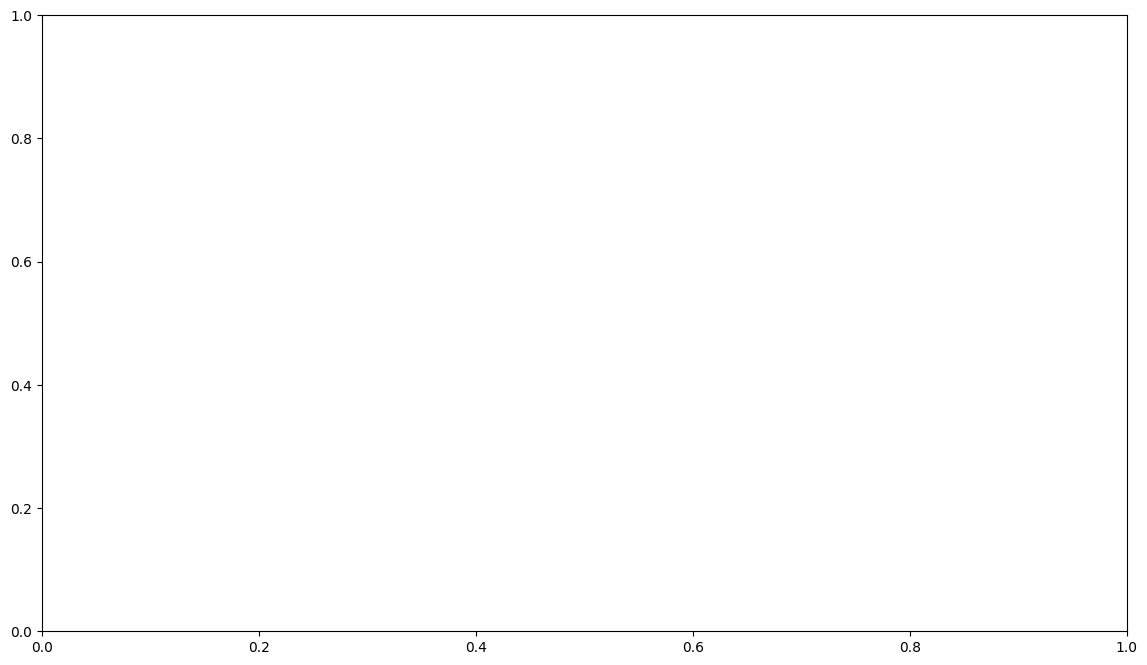

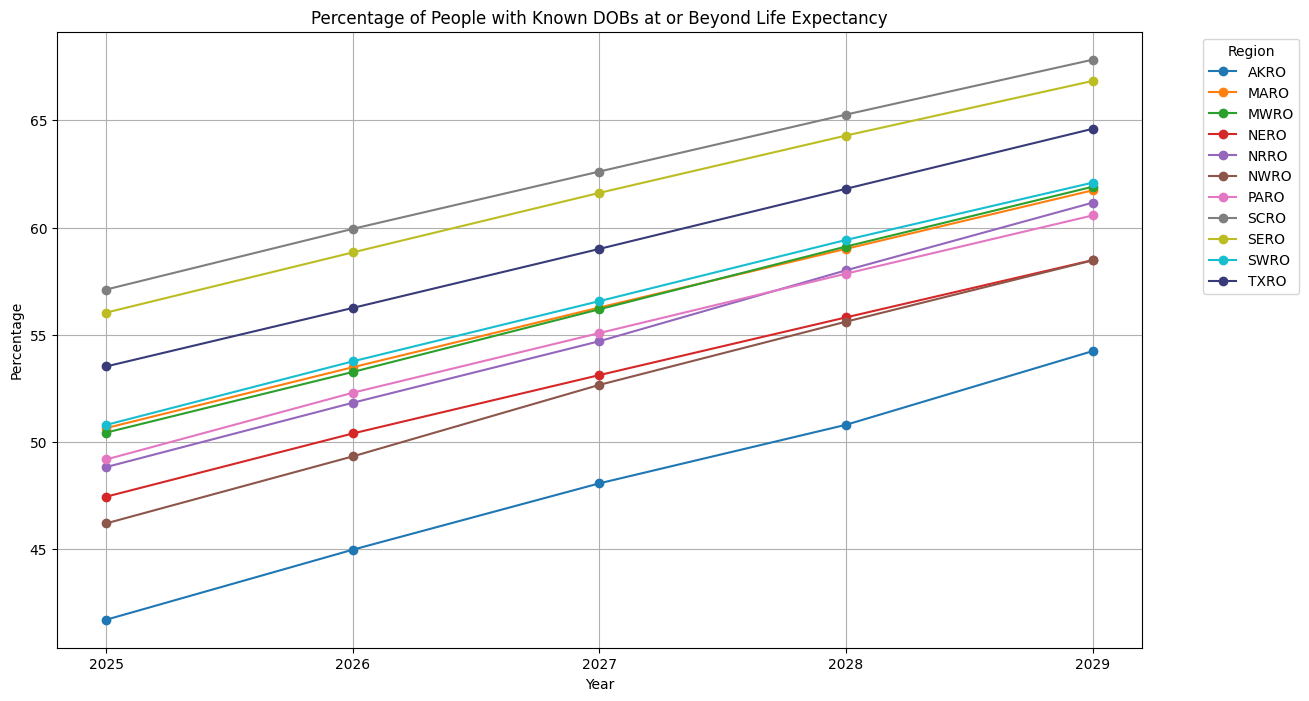

In [26]:
# List of years for plotting
years = [2025, 2026, 2027, 2028, 2029]

# Define a custom color palette excluding yellow and pale colors
custom_palette = sns.color_palette(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
                                    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#393b79'])

# Plot at or beyond life expectancy for each year using count instead of percentage
# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Use the custom color palette
sns.set_palette(custom_palette)

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the percent as line plots for each region
for region in grouped_df['REGION_CODE']:
    rates = grouped_df[grouped_df['REGION_CODE'] == region][[f'at_or_beyond_LE_{year}_percent' for year in years]].values.flatten()
    ax.plot(years, rates, marker='o', linestyle='-', label=region)

# Labels and legends
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of People with Known DOBs at or Beyond Life Expectancy')
ax.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(years)
plt.grid(True)
plt.show()

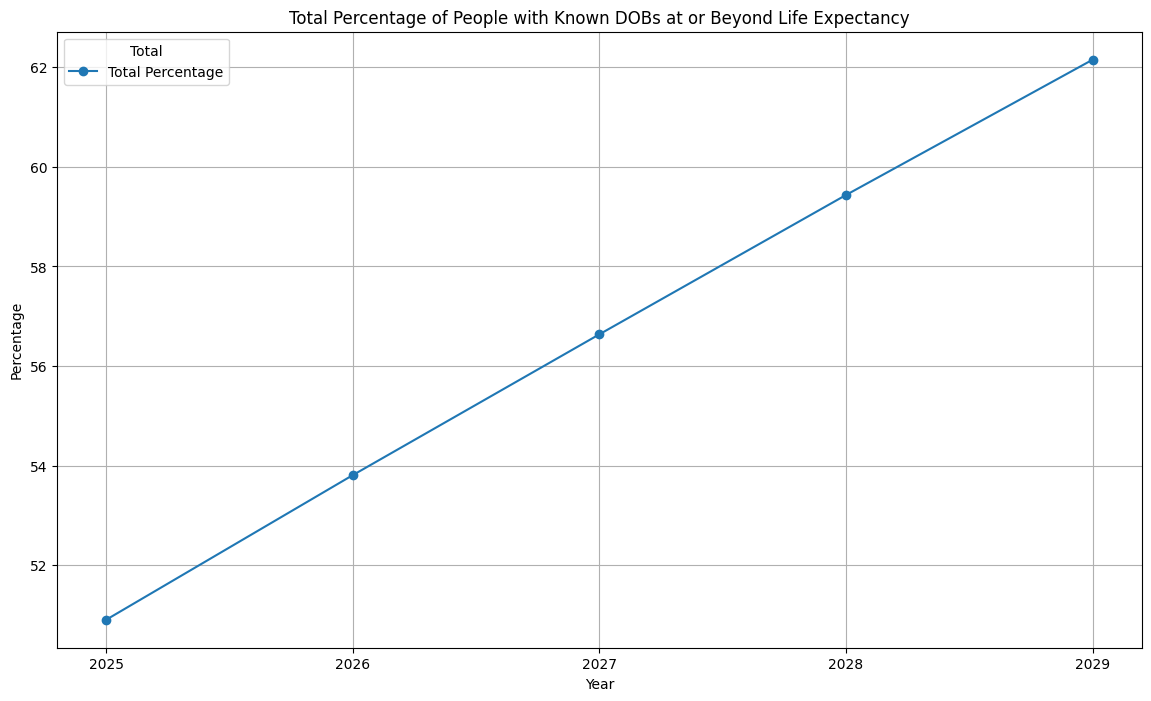

In [27]:
# Calculate total counts and total people for each year
total_counts = [grouped_df[f'at_or_beyond_LE_{year}_count'].sum() for year in years]
total_people = grouped_df['total_people'].sum()

# Calculate the total percentage for each year
total_percentages = [(count / total_people) * 100 for count in total_counts]

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the total percentage as a line plot
ax.plot(years, total_percentages, marker='o', linestyle='-', label='Total Percentage')

# Labels and legends
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
ax.set_title('Total Percentage of People with Known DOBs at or Beyond Life Expectancy')
ax.legend(title='Total')

plt.xticks(years)
plt.grid(True)
plt.show()

In [28]:
# Show percentage at or beyond life expectancy for each year and the year
table = pd.DataFrame({
    'Year': years,
    'Total Count': total_counts,
    'Total Percentage': total_percentages
})

print("At or Beyond Life Expectancy by Year")
table

At or Beyond Life Expectancy by Year


,Year,Total Count,Total Percentage
0,2025,994392,50.907736
1,2026,1051103,53.811046
2,2027,1106327,56.638230
3,2028,1160953,59.434799
4,2029,1214003,62.150685


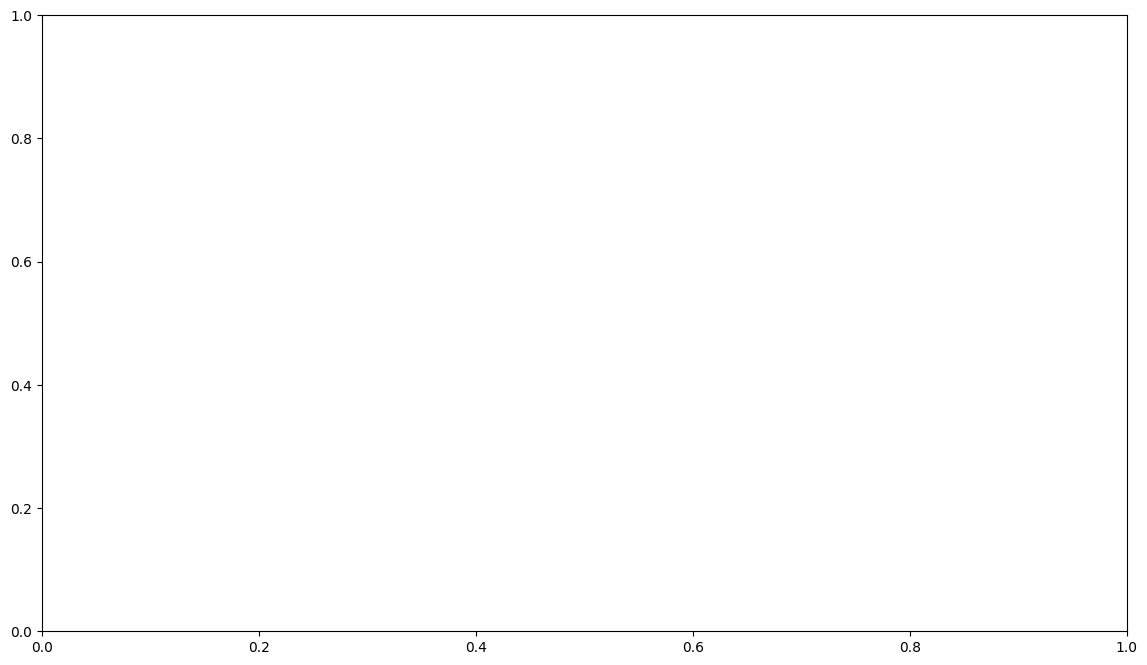

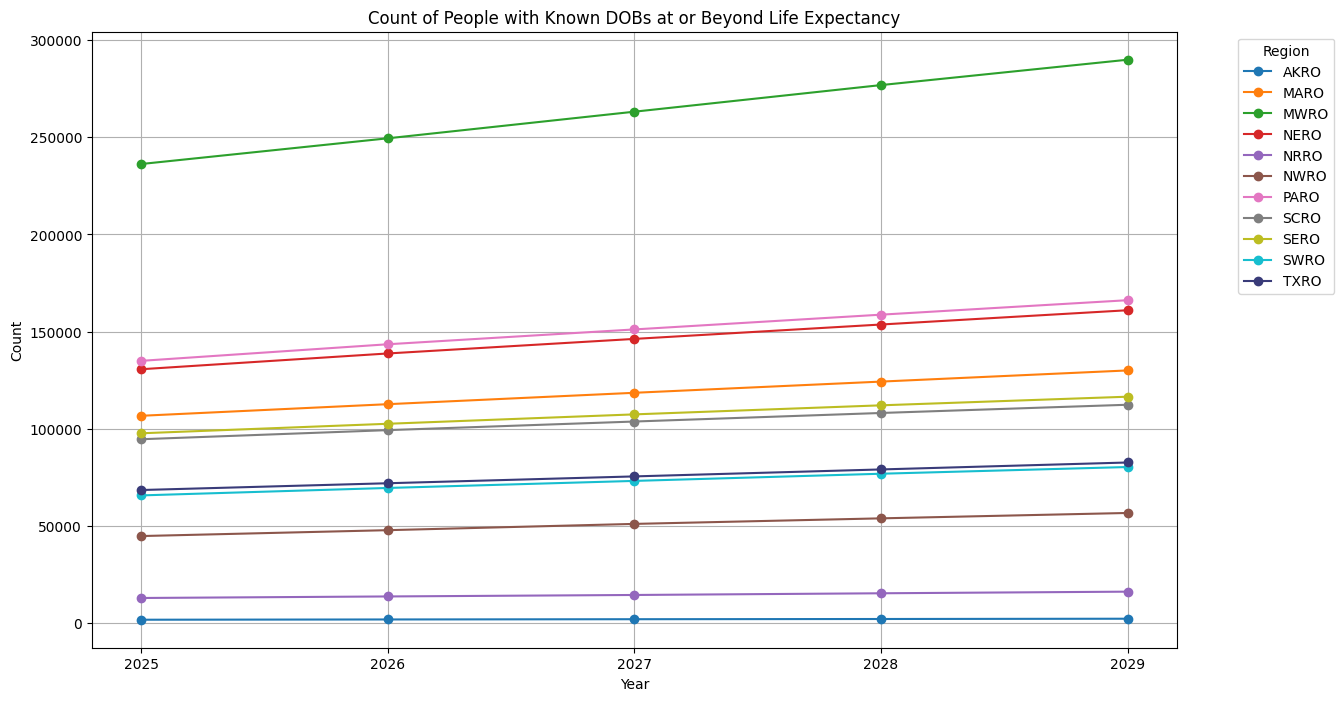

In [29]:
# List of years for plotting
years = [2025, 2026, 2027, 2028, 2029]

# Define a custom color palette excluding yellow and pale colors
custom_palette = sns.color_palette(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
                                    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#393b79'])

# Plot at or beyond life expectancy for each year using count instead of percentage
# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Use the custom color palette
sns.set_palette(custom_palette)

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the percent as line plots for each region
for region in grouped_df['REGION_CODE']:
    rates = grouped_df[grouped_df['REGION_CODE'] == region][[f'at_or_beyond_LE_{year}_count' for year in years]].values.flatten()
    ax.plot(years, rates, marker='o', linestyle='-', label=region)

# Labels and legends
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Count of People with Known DOBs at or Beyond Life Expectancy')
ax.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(years)
plt.grid(True)
plt.show()

In [30]:
# Function to flatten the feature_importance column
def flatten_feature_importance(df, column):
    # Parse the JSON data
    flattened_data = []
    for entry in df[column]:
        try:
            feature_data = json.loads(entry.replace("'", '"'))
            flattened_row = {}
            for idx, (feature, importance) in enumerate(zip(feature_data['Feature'], feature_data['Importance'])):
                flattened_row[f"feature_{idx+1}"] = feature
                flattened_row[f"feature_{idx+1}_score"] = importance
            flattened_data.append(flattened_row)
        except json.JSONDecodeError:
            print(f"Failed to parse JSON: {entry}")
            flattened_data.append({})
    # Convert the flattened data into a DataFrame
    feature_df = pd.DataFrame(flattened_data)
    # Concatenate the original DataFrame with the new flattened DataFrame
    df = pd.concat([df, feature_df], axis=1)
    # Drop the original feature_importance column
    df.drop(column, axis=1, inplace=True)
    return df
